In [1]:
# Standard library imports
import logging
import time
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.synthesis import TwoQubitWeylDecomposition

# Custom package imports
from pauli_propagation import PauliTerm, PauliPropagator
from pauli_propagation.utils import encode_pauli, random_su4
from pauli_propagation.gates import QuantumGate
from pauli_propagation.monte_carlo import MonteCarlo
from pauli_propagation import staircasetopology2d_qc
from pauli_propagation.decomposition import su4_kak_reconstruct, su4_kak_decomp


# Configure logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [ ]:
nx, ny = 4,4
L = 1

# 0) 构造电路与初始 PauliTerm
qc_2d = staircasetopology2d_qc(nx, ny, L)
qc_2d.draw(output='mpl',fold= -1);

n = qc_2d.num_qubits
pauli_label =  'Z' + "I" * (n - 1) 
key = encode_pauli(Pauli(pauli_label))
init_term = PauliTerm(1.0, key, n)
product_label = "0" * n
prop_2d = PauliPropagator(qc_2d)

layers_2d = prop_2d.propagate(init_term, max_weight=4)

exp_2d = prop_2d.expectation_pauli_sum(layers_2d[-1], product_label)
print(exp_2d)

Propagating, max weight: 4:   0%|          | 0/24 [00:00<?, ?it/s]

In [7]:
sv = Statevector.from_instruction(qc_2d)
P = Pauli(pauli_label)
exp_sv = np.real_if_close(sv.expectation_value(P))
print("Statevector expectation:", exp_sv)

Statevector expectation: -0.04339153442476812


Propagating, max weight: None:   0%|          | 0/60 [00:00<?, ?it/s]

-0.04339153442476732


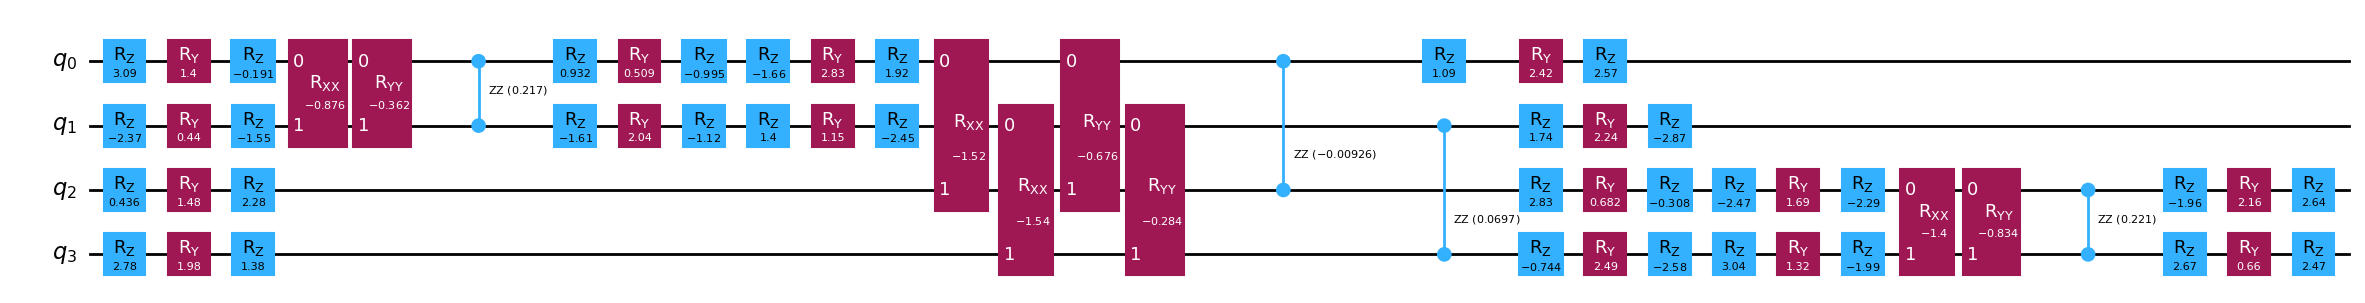

In [ ]:
qc_2d_kak = su4_kak_reconstruct(qc_2d)

qc_2d_kak.draw(output='mpl',fold= -1);

prop_kak_2d = PauliPropagator(qc_2d_kak)

layers_kak_2d = prop_kak_2d.propagate(init_term, max_weight=4)

exp_kak_2d = prop_kak_2d.expectation_pauli_sum(layers_kak_2d[-1], product_label)
print(exp_kak_2d)

In [ ]:
U = random_su4()

(K1l, K1r, K2l, K2r), (a, b, c), global_phase = kak_with_phase(U)

NameError: name 'kak_with_phase' is not defined

In [6]:
# pip install uv